<a href="https://colab.research.google.com/github/KhotNoorin/Mini-Projects/blob/main/Next_Word_Predictor_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
text = """
Natural Language Processing (NLP) is a fascinating field that focuses on the interaction between computers and humans through language.
It combines computational linguistics with machine learning and deep learning models.
NLP allows machines to read, decipher, understand, and make sense of human language in a valuable way.
With applications like chatbots, machine translation, sentiment analysis, and auto-correct, it’s impacting the way we interact with technology every day.
Deep learning models like LSTMs and Transformers have revolutionized this domain by capturing long-term dependencies in text data.
"""

In [ ]:
# Clean and split into sentences
corpus = text.lower().replace("\n", " ").split(". ")

In [ ]:
# Tokenization and Sequence Creation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        ngram = token_list[:i+1]
        input_sequences.append(ngram)

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

In [ ]:
print("Total words:", total_words)

Total words: 69


In [ ]:
print("Max sequence length:", max_seq_len)

Max sequence length: 21


In [ ]:
print("Input shape:", X.shape)

Input shape: (82, 20)


In [ ]:
# Build the LSTM Model
model = Sequential([
    Embedding(input_dim=total_words, output_dim=100),
    LSTM(150),
    Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the model manually by providing input shape
model.build(input_shape=(None, X.shape[1]))

# Show the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 20, 100)             │           6,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 150)                 │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 69)                  │          10,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,919 (655.93 KB)

 Trainable params: 167,919 (655.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Model
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0178 - loss: 4.2361
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0913 - loss: 4.2221
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1174 - loss: 4.2080
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0717 - loss: 4.1871
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0813 - loss: 4.1390
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0539 - loss: 4.0623
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0539 - loss: 4.0525
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0656 - loss: 3.9769
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0756 - loss: 3.9724
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0678 - loss: 3.8948
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0874 - loss: 3.8463
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1352 - lo

In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

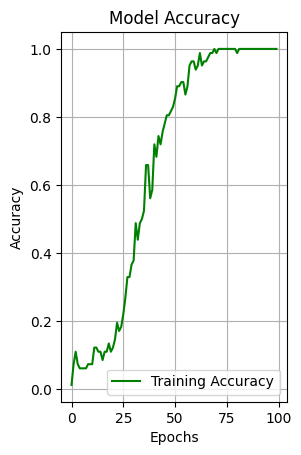

In [ ]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

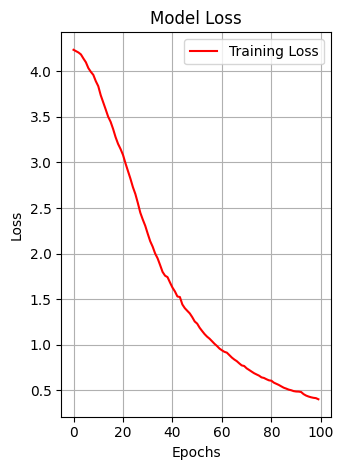

In [ ]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Predict Next Words
def predict_next_word(seed_text, n_words=5):
    for _ in range(n_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [ ]:
print("Generated Text 1:", predict_next_word("deep learning", 5))

Generated Text 1: deep learning models like lstms and transformers


In [ ]:
print("Generated Text 2:", predict_next_word("natural language", 5))

Generated Text 2: natural language processing nlp is a fascinating


In [ ]:
print("Generated Text 3:", predict_next_word("machines can", 5))

Generated Text 3: machines can allows machines to read decipher


In [ ]:
# Token-Level Confusion Matrix (Optional)
y_true = np.argmax(y, axis=1)
y_pred = np.argmax(model.predict(X, verbose=0), axis=1)

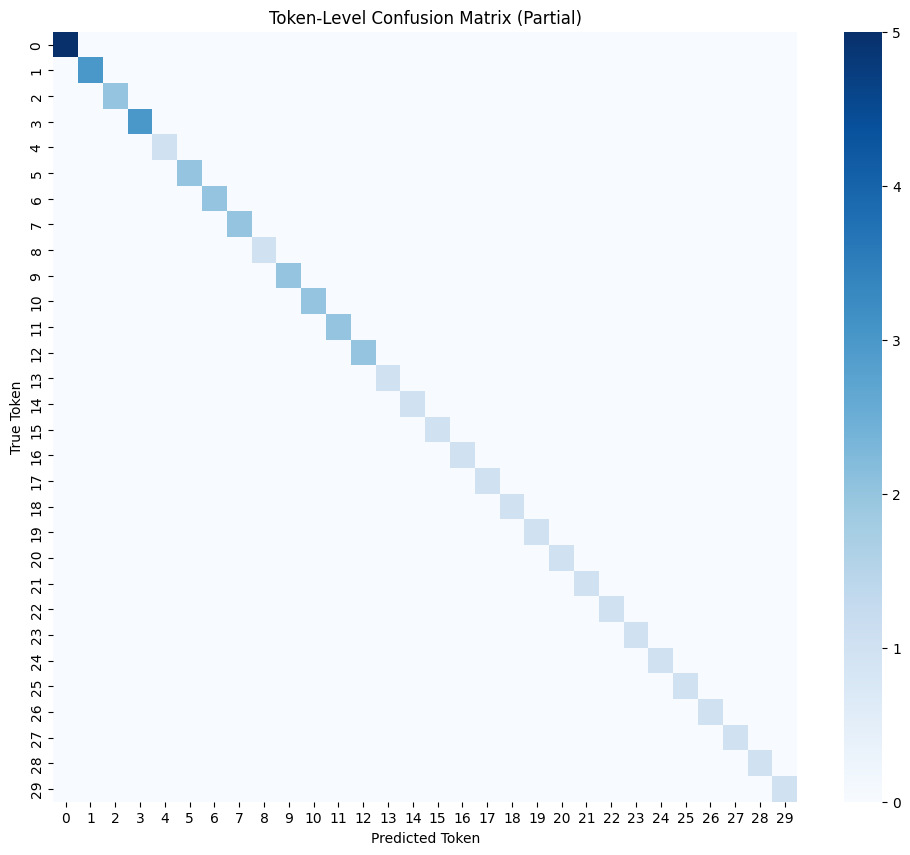

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm[:30, :30], annot=False, cmap='Blues')  # Slice to top 30 for readability
plt.title("Token-Level Confusion Matrix (Partial)")
plt.xlabel("Predicted Token")
plt.ylabel("True Token")
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_true, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          19       1.00    